In [135]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
learning_rate = 0.015
epoch = 20000

In [136]:
def sigmoid(z):
    return (1.0 / (1.0 + np.exp(-1.0*z)))

In [137]:
def Costfunc(Y,h):
    m = len(Y)
    J = 0.0
    J = (-1.0/(2*m))*(np.matmul(np.transpose(Y),np.log(h)) + np.matmul(np.transpose(np.ones((714,1)) - Y),np.log(np.ones((714,1)) - h)))
    return J[0][0]

In [138]:
def GradientDescent(X,Y,Theta):
    m = len(X)
    x1,cost1 = [],[]
    for i in range(epoch):
        z = np.matmul(X,Theta)
        h = sigmoid(z)
        loss = h - Y
        gradient = np.matmul(np.transpose(X),loss)/(2*m)
        Theta = Theta - (learning_rate*gradient)
        cost = Costfunc(Y,h)
        x1.append(i)
        cost1.append(cost)
    return Theta,x1,cost1

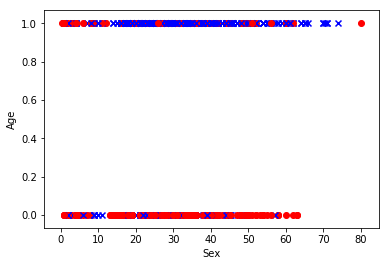

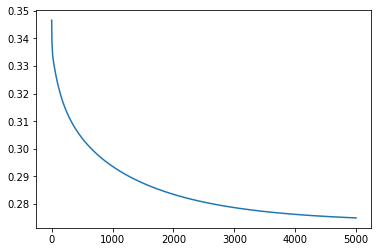

Accuracy is: 
76.89075630252101


In [139]:
Z = pd.read_csv('./train.csv',header = None , usecols = [1,2,4,5,6,7])
Z = Z.drop(0, 0)
Z.dropna(inplace = True)
X = np.array(Z.drop(1,1))
Y = np.array(Z[1])
for i,val in enumerate(X):
    Y[i] = float(Y[i])
    if(val[1] == 'male'):
        val[1] = 1
    else:
        val[1] = 0
    for k in range(len(val)):
        val[k] = float(val[k])
for i in range(len(X)):
    if(Y[i] == 0):
        plt.scatter(X[i][2],X[i][1],marker = 'x' , color = 'b')
    else:
        plt.scatter(X[i][2],X[i][1],marker = 'o' ,color = 'r')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()
plt.clf()
X = X.astype(float)
Y = Y.astype(float)
X = np.reshape(X,(714,5))
Y = np.reshape(Y,(714,1))
Theta = np.zeros((5,1))
cost1 = np.asarray(cost1)
Theta,x1,cost1 = GradientDescent(X,Y,Theta)
#for i in range(len(x1)):
    #print("i is : {} cst is : {}".format(x1[i],cost1[i]))
    #plt.scatter(x1[i],cost1[i],marker = 'x')
plt.plot(x1,cost1,'-')
plt.show()
pred = []
for i in range(len(X)):
    a = sigmoid(np.matmul(X[i],Theta))
    if(a >= 0.5):
        a = 1.0
        pred.append(a)
    else:
        a = 0.0
        pred.append(a)
count = 0
for i in range(len(Y)):
    if(Y[i]==pred[i]):
        count = count+1
print("Accuracy is: ")
print(count*100/len(X))